In [88]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from scipy.stats import zscore, shapiro, kstest, anderson
import pingouin as pg
from statsmodels.stats.diagnostic import lilliefors, het_goldfeldquandt
import joblib

In [5]:
df_colesterol = pd.read_csv('./Datasets/Dataset_colesterol.csv')

In [6]:
df_colesterol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  1000 non-null   int64  
 1   Grupo Sanguíneo     996 non-null    object 
 2   Fumante             997 non-null    object 
 3   Nível de Atividade  996 non-null    object 
 4   Idade               997 non-null    float64
 5   Peso                997 non-null    float64
 6   Altura              997 non-null    float64
 7   Colesterol          1000 non-null   float64
dtypes: float64(4), int64(1), object(3)
memory usage: 62.6+ KB


In [7]:
df_colesterol.drop(columns=['Id'], axis=1, inplace=True)

In [8]:
#Renomear colunas para a facilidade de trabalho
df_colesterol.columns = [
    'grupoSanguineo',
    'fumante',
    'nivelAtvFisica',
    'idade',
    'peso',
    'altura',
    'nivelColesterol'
]

In [9]:
#Copiar df para df EDA
df_colesterolEda = df_colesterol.copy()

In [10]:
#Copiar df para df Bucketing
df_colesterolBuck = df_colesterol.copy()

### EDA

In [11]:
#Visualizar os dados
df_colesterolEda.head(10)

,grupoSanguineo,fumante,nivelAtvFisica,idade,peso,altura,nivelColesterol
0,B,Sim,Baixo,33.0,85.1,186.0,199.63
1,A,Não,Moderado,68.0,105.0,184.0,236.98
2,O,Não,Alto,25.0,64.8,180.0,161.79
3,A,Não,Alto,43.0,120.2,167.0,336.24
4,AB,Não,Baixo,79.0,88.5,175.0,226.23
5,B,Não,Baixo,68.0,66.8,170.0,185.31
6,A,Sim,Baixo,60.0,117.3,181.0,289.33
7,O,Sim,Moderado,35.0,86.9,174.0,216.48
8,O,Não,Baixo,62.0,81.3,166.0,235.30
9,B,Sim,Alto,44.0,32.7,165.0,97.79


In [12]:
#Detectar valores ausentes
df_colesterolEda.isna().sum()

grupoSanguineo     4
fumante            3
nivelAtvFisica     4
idade              3
peso               3
altura             3
nivelColesterol    0
dtype: int64

In [13]:
# Medidas estatisticas do df
df_colesterolEda.describe()

,idade,peso,altura,nivelColesterol
count,997.000000,997.000000,997.000000,1000.000000
mean,49.206620,76.496690,174.889669,199.453260
std,17.476704,21.439132,8.844703,50.625152
min,20.000000,15.400000,160.000000,36.260000
25%,34.000000,61.700000,167.000000,166.345000
50%,49.000000,75.500000,175.000000,199.455000
75%,65.000000,90.200000,183.000000,233.785000
max,79.000000,158.100000,190.000000,372.670000


In [14]:
#COletar modas das variaveis categoricas
moda_gSang = df_colesterolEda.grupoSanguineo.mode()
moda_fumante = df_colesterolEda.fumante.mode()
moda_nivAtv = df_colesterolEda.nivelAtvFisica.mode()

In [15]:
#Coletar medidas das variaveis numericas
mediana_idade = df_colesterolEda.idade.median()
mediana_peso = df_colesterolEda.peso.median()
mediana_altura = df_colesterolEda.altura.median()

In [16]:
df_colesterolEda.fillna(value={'grupoSanguineo': moda_gSang[0],
                               'fumante': moda_fumante[0],
                               'nivelAtvFisica':moda_nivAtv[0],
                               'idade':mediana_idade,
                               'altura':mediana_altura,
                               'peso':mediana_peso
                               },inplace=True)

In [17]:
df_colesterolEda.isna().sum()

grupoSanguineo     0
fumante            0
nivelAtvFisica     0
idade              0
peso               0
altura             0
nivelColesterol    0
dtype: int64

In [18]:
df_colesterolEda.altura = df_colesterolEda.altura.astype(int)
df_colesterolEda.idade = df_colesterolEda.idade.astype(int)

In [19]:
df_colesterolEda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   grupoSanguineo   1000 non-null   object 
 1   fumante          1000 non-null   object 
 2   nivelAtvFisica   1000 non-null   object 
 3   idade            1000 non-null   int64  
 4   peso             1000 non-null   float64
 5   altura           1000 non-null   int64  
 6   nivelColesterol  1000 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 54.8+ KB


In [20]:
df_colesterolEda.head(10)

,grupoSanguineo,fumante,nivelAtvFisica,idade,peso,altura,nivelColesterol
0,B,Sim,Baixo,33,85.1,186,199.63
1,A,Não,Moderado,68,105.0,184,236.98
2,O,Não,Alto,25,64.8,180,161.79
3,A,Não,Alto,43,120.2,167,336.24
4,AB,Não,Baixo,79,88.5,175,226.23
5,B,Não,Baixo,68,66.8,170,185.31
6,A,Sim,Baixo,60,117.3,181,289.33
7,O,Sim,Moderado,35,86.9,174,216.48
8,O,Não,Baixo,62,81.3,166,235.30
9,B,Sim,Alto,44,32.7,165,97.79


<Axes: xlabel='idade'>

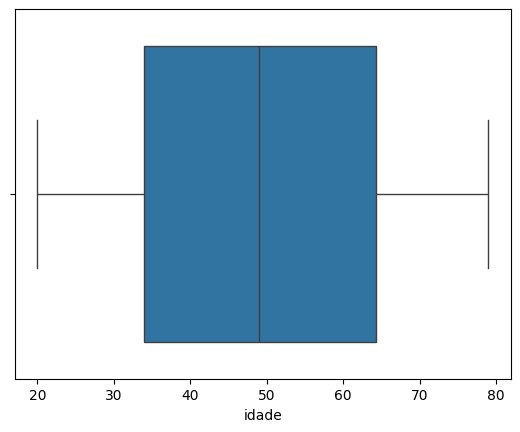

In [21]:
#Verificar/Detectar outliers
sns.boxplot(data=df_colesterolEda, x='idade')

<Axes: xlabel='peso'>

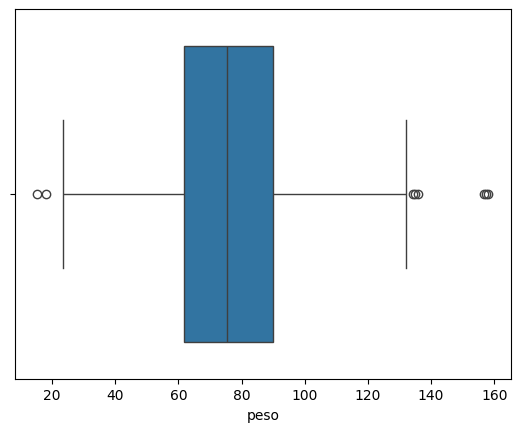

In [22]:
sns.boxplot(data=df_colesterolEda, x='peso')

In [23]:
#filtrar o publico a ser removido
df_colesterolEda[df_colesterolEda['peso']<40].peso.count()

np.int64(37)

In [24]:
#Remover publico do df
df_colesterolEda.drop(df_colesterolEda[df_colesterolEda['peso'] < 40].index, axis=0, inplace=True)

In [25]:
df_colesterolEda.describe()

,idade,peso,altura,nivelColesterol
count,963.000000,963.000000,963.000000,963.000000
mean,49.186916,78.166355,175.026999,203.588027
std,17.518875,19.971319,8.826539,46.739475
min,20.000000,40.400000,160.000000,102.200000
25%,34.000000,63.850000,167.000000,170.595000
50%,49.000000,76.600000,175.000000,201.980000
75%,65.000000,91.000000,183.000000,235.335000
max,79.000000,158.100000,190.000000,372.670000


<Axes: xlabel='altura'>

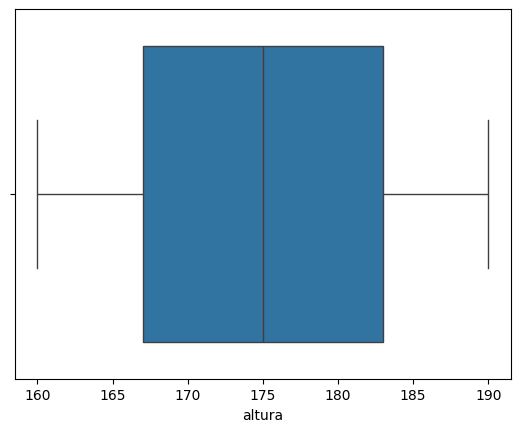

In [26]:
sns.boxplot(data=df_colesterolEda, x='altura')

<Axes: xlabel='nivelColesterol'>

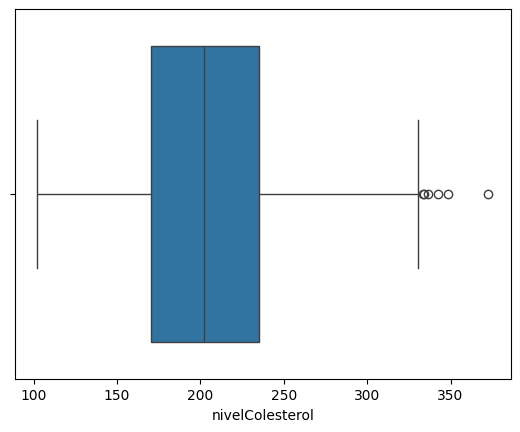

In [27]:
sns.boxplot(data=df_colesterolEda, x='nivelColesterol')

<Axes: xlabel='grupoSanguineo', ylabel='nivelColesterol'>

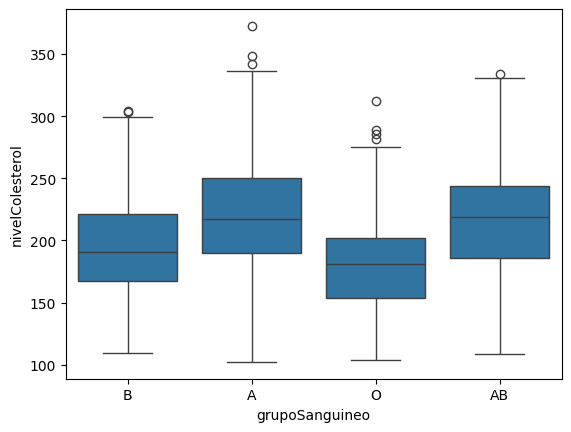

In [28]:
#Cruzamento de variaveis categoricas com nivel de colesterol
sns.boxplot(data=df_colesterolEda, x='grupoSanguineo', y='nivelColesterol')

<Axes: xlabel='fumante', ylabel='nivelColesterol'>

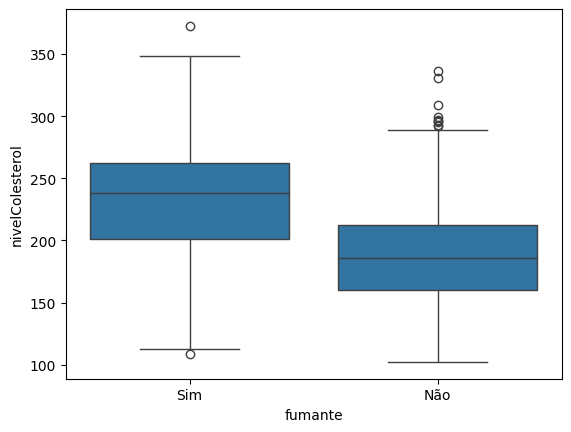

In [29]:
sns.boxplot(data=df_colesterolEda, x='fumante', y='nivelColesterol')

<Axes: xlabel='nivelAtvFisica', ylabel='nivelColesterol'>

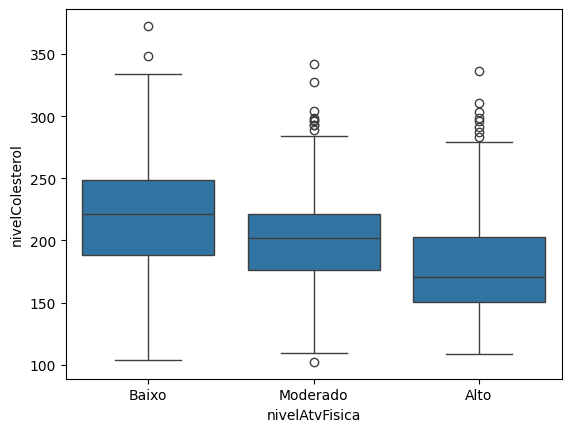

In [30]:
sns.boxplot(data=df_colesterolEda, x='nivelAtvFisica', y='nivelColesterol')

<Axes: xlabel='idade', ylabel='nivelColesterol'>

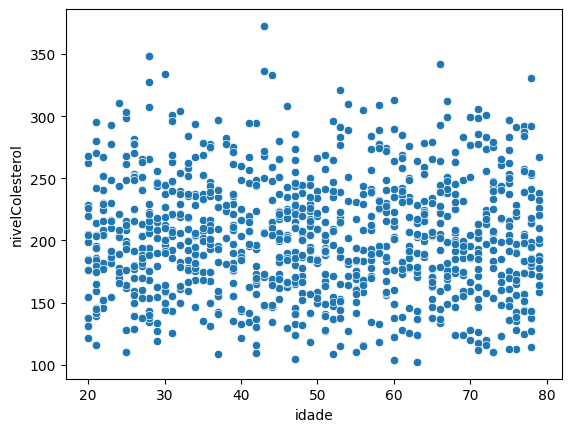

In [31]:
#Cruzamento variaveis numericas com nivel de colesterol
sns.scatterplot(data=df_colesterolEda, x='idade', y='nivelColesterol')

<Axes: xlabel='peso', ylabel='nivelColesterol'>

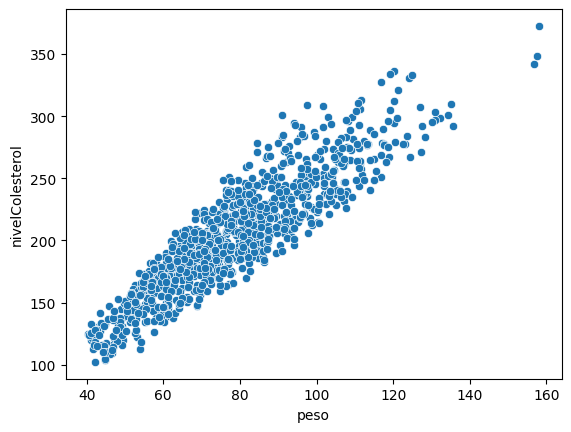

In [32]:
sns.scatterplot(data=df_colesterolEda, x='peso', y='nivelColesterol')

<Axes: xlabel='altura', ylabel='nivelColesterol'>

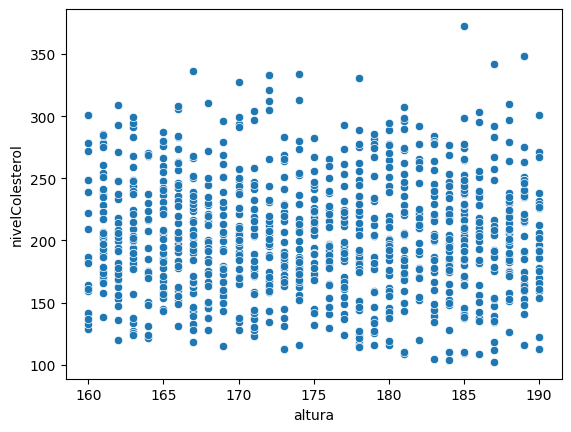

In [33]:
sns.scatterplot(data=df_colesterolEda, x='altura', y='nivelColesterol')

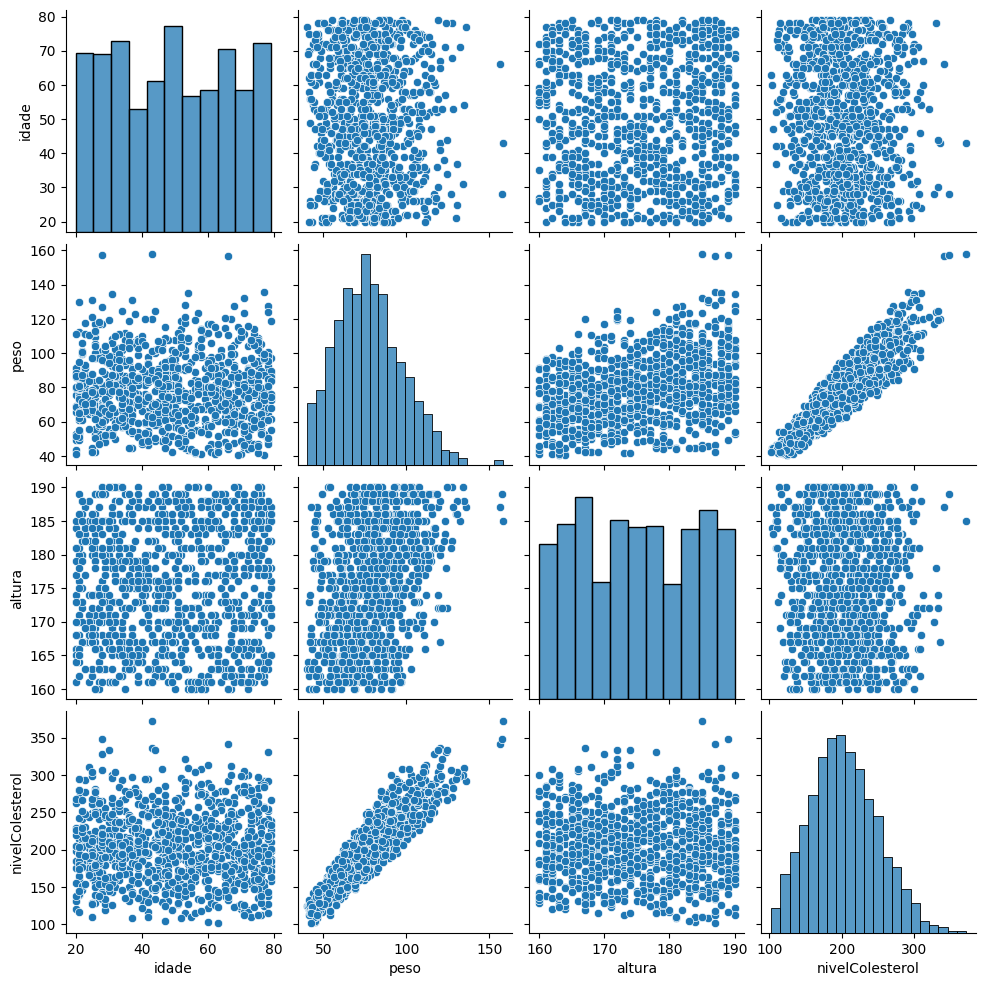

In [34]:
sns.pairplot(df_colesterolEda)

In [35]:
df_colesterolEda = pd.get_dummies(df_colesterolEda, columns=['grupoSanguineo','fumante'],dtype='int64')

In [36]:
df_colesterolEda.head(10)

,nivelAtvFisica,idade,peso,altura,nivelColesterol,grupoSanguineo_A,grupoSanguineo_AB,grupoSanguineo_B,grupoSanguineo_O,fumante_Não,fumante_Sim
0,Baixo,33,85.1,186,199.63,0,0,1,0,0,1
1,Moderado,68,105.0,184,236.98,1,0,0,0,1,0
2,Alto,25,64.8,180,161.79,0,0,0,1,1,0
3,Alto,43,120.2,167,336.24,1,0,0,0,1,0
4,Baixo,79,88.5,175,226.23,0,1,0,0,1,0
5,Baixo,68,66.8,170,185.31,0,0,1,0,1,0
6,Baixo,60,117.3,181,289.33,1,0,0,0,0,1
7,Moderado,35,86.9,174,216.48,0,0,0,1,0,1
8,Baixo,62,81.3,166,235.30,0,0,0,1,1,0
10,Baixo,57,123.6,183,283.87,1,0,0,0,0,1


In [37]:
#Converter variavel categorica ordinal em numerica, usando factorize pandas
df_colesterolEda['nivelAtvFisica'] = pd.factorize(df_colesterolEda.nivelAtvFisica)[0] + 1

<Axes: >

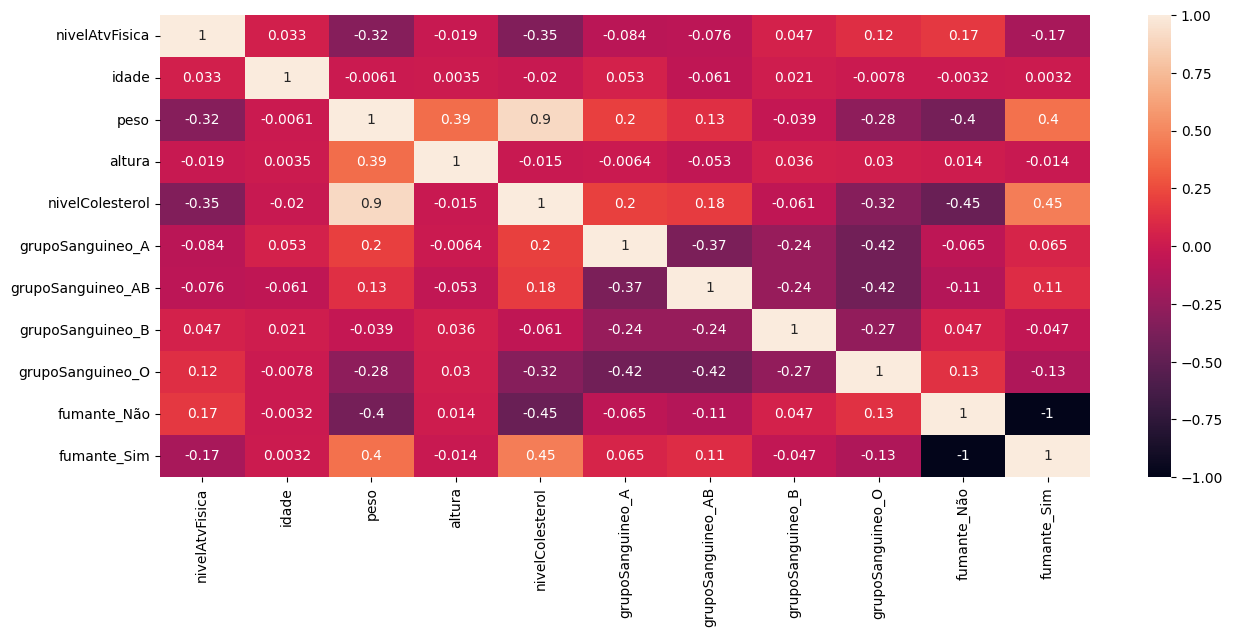

In [38]:
#Mapa de calor com correlação entre as variaveis
plt.figure(figsize=(15,6))
sns.heatmap(df_colesterolEda.corr(), vmin=-1,vmax=1,annot=True)

<Axes: >

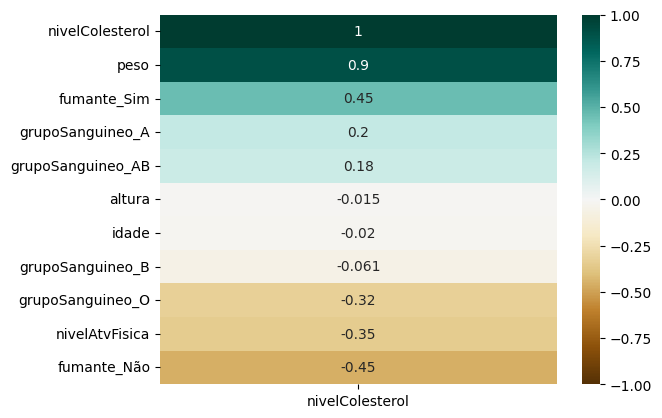

In [39]:
sns.heatmap(df_colesterolEda.corr()[['nivelColesterol']].sort_values(by='nivelColesterol', ascending=False), vmin=-1,vmax=1,annot=True, cmap='BrBG')

In [40]:
#Bucketing
#idade = 20 - 79
#categorizar a variavel numerica (pegando por ranges e nao por numeros em si)
bins = [20,30,40,50,60,70,80]
labels = ['20-29','30-39','40-49','50-59','60-69','70-79']
df_colesterolBuck['escalaIdade'] = pd.cut(x=df_colesterolBuck['idade'], bins=bins, labels=labels, include_lowest=True)

In [41]:
df_colesterolBuck.head(10)

,grupoSanguineo,fumante,nivelAtvFisica,idade,peso,altura,nivelColesterol,escalaIdade
0,B,Sim,Baixo,33.0,85.1,186.0,199.63,30-39
1,A,Não,Moderado,68.0,105.0,184.0,236.98,60-69
2,O,Não,Alto,25.0,64.8,180.0,161.79,20-29
3,A,Não,Alto,43.0,120.2,167.0,336.24,40-49
4,AB,Não,Baixo,79.0,88.5,175.0,226.23,70-79
5,B,Não,Baixo,68.0,66.8,170.0,185.31,60-69
6,A,Sim,Baixo,60.0,117.3,181.0,289.33,50-59
7,O,Sim,Moderado,35.0,86.9,174.0,216.48,30-39
8,O,Não,Baixo,62.0,81.3,166.0,235.30,60-69
9,B,Sim,Alto,44.0,32.7,165.0,97.79,40-49


<Axes: xlabel='escalaIdade', ylabel='nivelColesterol'>

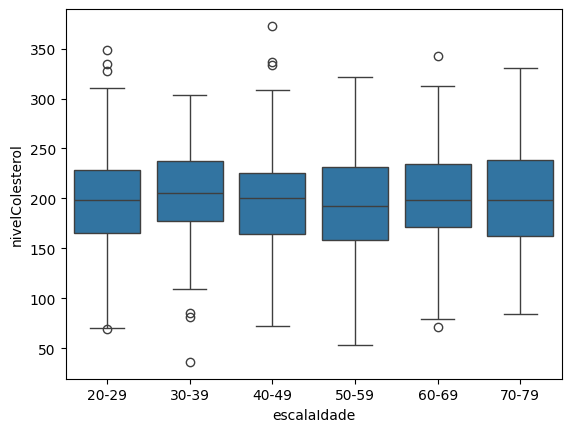

In [42]:
sns.boxplot(data=df_colesterolBuck, x='escalaIdade', y='nivelColesterol')

In [43]:
bins = [40,50,60,70,80,90,100,110,120,130,140,150,160]
labels = ['40-49','50-59','60-69','70-79','80-89','90-99','100-109','110-119','120-129','130-139','140-149','150-159']
df_colesterolBuck['escalaPeso'] = pd.cut(x=df_colesterolBuck['peso'], bins=bins, labels=labels, include_lowest=True)

In [44]:
df_colesterolBuck.head(10)

,grupoSanguineo,fumante,nivelAtvFisica,idade,peso,altura,nivelColesterol,escalaIdade,escalaPeso
0,B,Sim,Baixo,33.0,85.1,186.0,199.63,30-39,80-89
1,A,Não,Moderado,68.0,105.0,184.0,236.98,60-69,100-109
2,O,Não,Alto,25.0,64.8,180.0,161.79,20-29,60-69
3,A,Não,Alto,43.0,120.2,167.0,336.24,40-49,120-129
4,AB,Não,Baixo,79.0,88.5,175.0,226.23,70-79,80-89
5,B,Não,Baixo,68.0,66.8,170.0,185.31,60-69,60-69
6,A,Sim,Baixo,60.0,117.3,181.0,289.33,50-59,110-119
7,O,Sim,Moderado,35.0,86.9,174.0,216.48,30-39,80-89
8,O,Não,Baixo,62.0,81.3,166.0,235.30,60-69,80-89
9,B,Sim,Alto,44.0,32.7,165.0,97.79,40-49,NaN


<Axes: xlabel='escalaPeso', ylabel='nivelColesterol'>

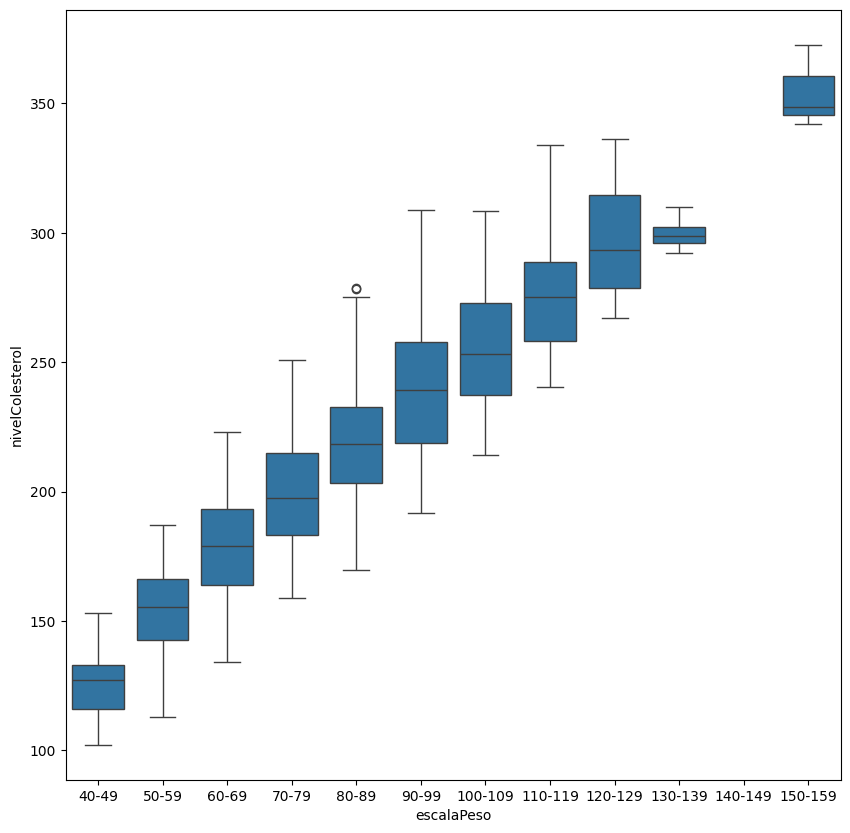

In [45]:
plt.figure(figsize=(10,10))
sns.boxplot(data=df_colesterolBuck, x='escalaPeso', y='nivelColesterol')

### TREINAR MODELO

In [46]:
#Aplicar tratamento de outliers antes do pipeline
df_colesterol.drop(df_colesterol[df_colesterol['peso'] < 40].index, axis=0, inplace=True)

In [47]:
df_colesterol.info()

<class 'pandas.core.frame.DataFrame'>
Index: 963 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   grupoSanguineo   960 non-null    object 
 1   fumante          960 non-null    object 
 2   nivelAtvFisica   959 non-null    object 
 3   idade            960 non-null    float64
 4   peso             960 non-null    float64
 5   altura           960 non-null    float64
 6   nivelColesterol  963 non-null    float64
dtypes: float64(4), object(3)
memory usage: 60.2+ KB


In [48]:
X = df_colesterol.drop(columns='nivelColesterol')
y= df_colesterol.nivelColesterol

In [49]:
#Split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=51)

In [50]:
X_test.shape

(289, 6)

In [51]:
#Pipeline
# inputar moda nas variaveis categoricas - grupo sanguineo, fumante, nivel de atividade fisica
# Inputar mediana nas variaveis numericas - idade, altura, peso
# padronizar variaveis numericas - idaide, altura, peso
# OnehotEncode varivareis categoricas nominais - grupo sanguineo e fumante
# OrdinalEncoder nas variaveis categoricas ordinais - nivel atividade fisica

# Nomes das colunas
colunas_categoricas = ['grupoSanguineo','fumante']
colunas_numericas = ['peso','altura','peso']
colunas_ordinais = ['nivelAtvFisica']

In [52]:
#Transformer categoricas
transformer_categorias = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('OneHotEncoding', OneHotEncoder(handle_unknown='ignore'))
])

In [53]:
#Transformer Ordinais
transformer_ordinais = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ordinal', OrdinalEncoder(categories=[['Baixo','Moderado','Alto']], handle_unknown='error'))
])

In [54]:
#Transformer Numericas
transformer_numericas = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

In [55]:
# Criar um columntransformer que encapsula todas as transformações
preprocessor = ColumnTransformer(
    transformers=[
        ('num', transformer_numericas, colunas_numericas),
        ('cat', transformer_categorias, colunas_categoricas),
        ('ord', transformer_ordinais, colunas_ordinais)
    ]
)

In [56]:
#Criando o Pipeline Principal = pre-processamento + treinamento do modelo
model_reg = Pipeline(steps=[('preprocessor',preprocessor),('Modelo',LinearRegression())])

In [57]:
#Treinar Modelo
model_reg.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['peso', 'altura', 'peso']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('OneHotEncoding',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['grupoSanguineo',
                                                   'fumante']),
                                                 ('ord',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinal',
                                                                   OrdinalEncoder(categories=[['Baixo',
                                                                                               'Moderado',
                                                                                               'Alto']]))]),
                                                  ['nivelAtvFisica'])])),
                ('Modelo', LinearRegression())])

### ANALISE DE METRICAS

In [58]:
#Gerar predição
y_pred = model_reg.predict(X_test)

In [59]:
#Calcular o r2-score
r2_score(y_test,y_pred)

0.9593045386338911

In [60]:
#Calcular EMA erro medio absoluto
mean_absolute_error(y_test,y_pred)

np.float64(7.325813148788927)

In [61]:
mean_squared_error(y_test,y_pred)

np.float64(83.01309398788928)

### ANALISE DE RESIDUOS

In [62]:
#calcular residuos
residuos = y_test - y_pred

In [63]:
#Transformar os residuos na escala padrão
#baseada na distribuição normal (x-media)/desvio padrão
residuos_std = zscore(residuos)

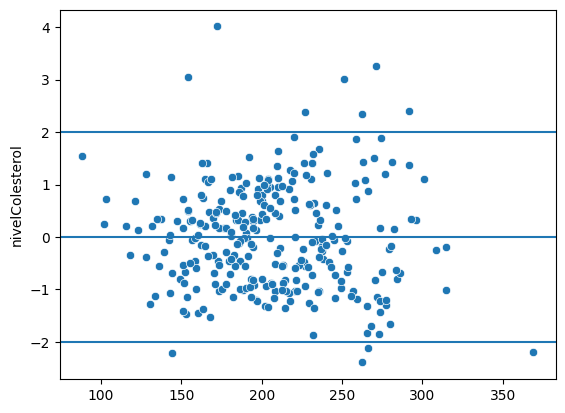

In [64]:
#verificar linearidade dos residuos: Valores estão entre -2 e +2 
#Verificar homocedasticidade: Valores em torno da reta (verificar se a variancia dos residuos é homogenea)
sns.scatterplot(x=y_pred, y=residuos_std)
plt.axhline(y=0)
plt.axhline(y=2)
plt.axhline(y=-2)

Alguns pontos externos ao niveis 2 e -2, mas não é uma quantidade consideravel, talvez existam ocorrencias com erros de medição que necessitavam de tratamento

homocedasticidade - aparenta estarem em torno da reta, executaremos teste para confirmação

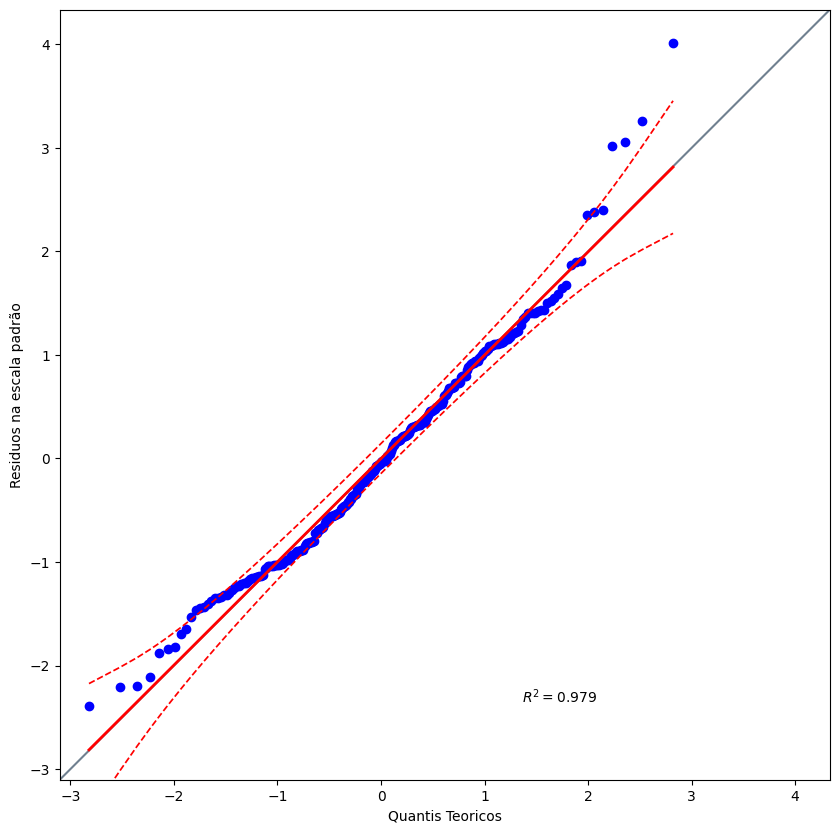

In [69]:
# Checar se residuos seguem uma distribuição normal
plt.figure(figsize=(10,10))
pg.qqplot(residuos_std, dist='norm', confidence=0.95)
plt.xlabel('Quantis Teoricos')
plt.ylabel('Residuos na escala padrão')
plt.show()

Alguns valores passam da banda de segurança, mas maioria dos valores esta dentro, não pode-se afirmar apenas observando o grafico, seguiremos mais alguns testes

In [71]:
#teste de normalidade de Shapiro-Wilk
stat_shapiro, p_value_shapiro = shapiro(residuos)
print('Estatistica do teste: {} e P-value: {}'.format(stat_shapiro,p_value_shapiro))

Estatistica do teste: 0.9805860025555492 e P-value: 0.0005787949491381424


como p-value é menor do que 0.005 pelo teste de shapiro os residuos nao seguem uma distribuição normal, testaremos agora por kolmogorov-smirnov

In [72]:
stat_ks, p_value_ks = kstest(residuos, 'norm')
print("Estatistica do teste: {} e P-Value: {}".format(stat_ks,p_value_ks))

Estatistica do teste: 0.4286512352486848 e P-Value: 9.779712620371614e-49


Os dois testes rejeitaram a hipotese da distribuição normal dos residuos

In [73]:
#Teste de liliefors
stat_ll, p_value_ll = lilliefors(residuos, dist='norm', pvalmethod='table')
print("Estatistica do teste: {} e p-value: {}".format(stat_ll, p_value_ll))

Estatistica do teste: 0.04528399815291967 e p-value: 0.2192595009043744


Pelo teste de liliefors os residuos seguem distribuição normal

In [74]:
#Teste de Anderson-Darling
stat_AD, critical_AD, significance_AD = anderson(residuos, dist='norm')

In [75]:
critical_AD

array([0.568, 0.647, 0.776, 0.906, 1.077])

In [76]:
significance_AD

array([15. , 10. ,  5. ,  2.5,  1. ])

In [77]:
print("Estatistica do teste: {} e valor critico: {}".format(stat_AD, critical_AD[2]))

Estatistica do teste: 0.9458665310464198 e valor critico: 0.776


Se a estatistica for maior que valor critico, rejeitamos o H0, ou seja nao segue distribuição normal

In [78]:
#Teste de homocedasticidade de goldfeld-quandt
pipe = Pipeline(steps=[('preprocessor',preprocessor)])
X_test_transformed = pipe.fit_transform(X_test)

In [80]:
X_test_transformed

array([[ 0.22608781, -0.58669129,  0.22608781, ...,  0.        ,
         1.        ,  0.        ],
       [-1.20886474, -1.05685776, -1.20886474, ...,  1.        ,
         0.        ,  0.        ],
       [-0.84754575, -0.35160806, -0.84754575, ...,  0.        ,
         1.        ,  1.        ],
       ...,
       [-1.09014564, -1.52702423, -1.09014564, ...,  1.        ,
         0.        ,  1.        ],
       [ 0.17447081, -0.35160806,  0.17447081, ...,  1.        ,
         0.        ,  0.        ],
       [-1.65277092, -1.17439938, -1.65277092, ...,  0.        ,
         1.        ,  0.        ]])

In [81]:
test_goldfeld = het_goldfeldquandt(residuos, X_test_transformed)
stat_goldfeld = test_goldfeld[0]
p_value_goldfeld = test_goldfeld[1]
print("Estatistica do teste: {} e valor critico: {}".format(stat_goldfeld, p_value_goldfeld))

Estatistica do teste: 0.6480778364595962 e valor critico: 0.9941067882344867


### Realizar predições individuais

In [82]:
predicao_individual = {
    'grupoSanguineo':'O',
    'fumante':'Não',
    'nivelAtvFisica':'Alto',
    'idade':40,
    'peso':70,
    'altura':180
}

In [85]:
sample_df = pd.DataFrame(predicao_individual, index=[1])

In [86]:
sample_df

,grupoSanguineo,fumante,nivelAtvFisica,idade,peso,altura
1,O,Não,Alto,40,70,180


In [87]:
#Predição
model_reg.predict(sample_df)

array([165.25])

In [89]:
#Salvar Modelo
joblib.dump(model_reg, './modelo_colesterol.pkl')

['./modelo_colesterol.pkl']